In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Embedding, Flatten

# preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [3]:
df = pd.read_csv("review (1).csv")
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


0 is -ve sentiment and 1 is +ve sentiment…

In [4]:
df.shape

(999, 3)

In [5]:
df['sentiment'].value_counts()

sentiment
1    500
0    499
Name: count, dtype: int64

In [6]:
positive = ' '.join(df[df["sentiment"]==1]["review"])
negative = ' '.join(df[df["sentiment"]==0]["review"])

## The above code is concatenating all reviews from a pandas DataFrame (df) into two separate strings:

1. positive → Contains all reviews where "sentiment" is 1, joined together with spaces.
2. negative → Contains all reviews where "sentiment" is 0, joined together with spaces.

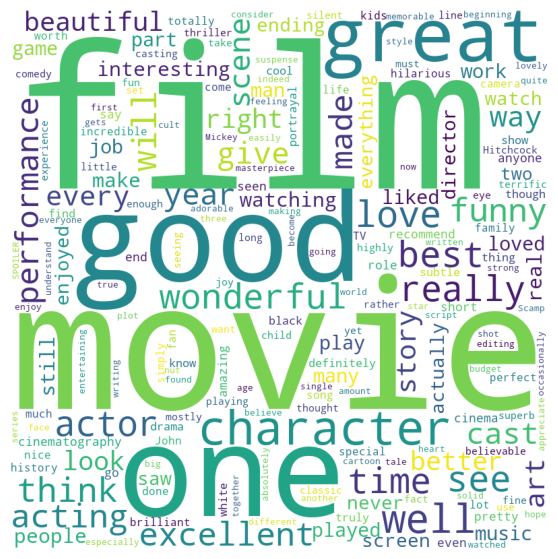

In [7]:
wc = WordCloud(width = 800, height = 800,
              background_color ='white',
              min_font_size = 10)

wc.generate(positive)

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show()

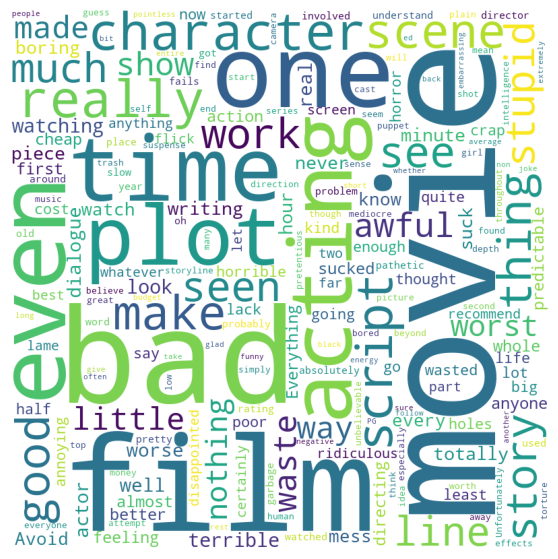

In [8]:
wc = WordCloud(width = 800, height = 800,
              background_color ='white',
              min_font_size = 10)

wc.generate(negative)

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [9]:
# feature target split
X = df["review"]
y = df["sentiment"]

In [10]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
# Machine Learning Approach

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# CountVectorizer
# tokenization, remove punctuation
cv = CountVectorizer(stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

## Remember one simple vectorisation step itself  is capable of performing Tokenisation, remove stopword and do vectorisation

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt1 = DecisionTreeClassifier()
dt1.fit(X_train_cv,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dt1.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       151
           1       0.68      0.72      0.70       149

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



## Scores are not really that good…So, we will go with TF-IDF

In [15]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [16]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dt2.predict(X_test_tfidf)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       151
           1       0.64      0.74      0.69       149

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.67      0.67      0.66       300



## Still, we are not getting good scores, So we will actually take a Deep learning Approach….

In [18]:
# Deep Learning Approach
# Keras tokenization

tok = Tokenizer()
tok.fit_on_texts(X_train)

In [19]:
vocabulary = tok.index_word
print(vocabulary)

{1: 'the', 2: 'and', 3: 'a', 4: 'of', 5: 'is', 6: 'this', 7: 'it', 8: 'i', 9: 'to', 10: 'in', 11: 'was', 12: 'movie', 13: 'film', 14: 'that', 15: 'for', 16: 'with', 17: 'as', 18: 'but', 19: 'are', 20: 'on', 21: 'not', 22: "it's", 23: 'just', 24: 'one', 25: 'you', 26: 'bad', 27: 'an', 28: 'all', 29: 'so', 30: 'about', 31: 'at', 32: 'very', 33: 'there', 34: 'like', 35: 'good', 36: 'by', 37: 'from', 38: 'have', 39: 'time', 40: 'he', 41: 'out', 42: 'even', 43: 'acting', 44: 'has', 45: 'his', 46: 'be', 47: 'were', 48: 'well', 49: 'if', 50: 'great', 51: 'who', 52: 'characters', 53: 'how', 54: 'more', 55: 'my', 56: 'or', 57: 'really', 58: 'see', 59: 'when', 60: 'some', 61: 'than', 62: 'no', 63: 'best', 64: 'plot', 65: 'made', 66: 'story', 67: 'movies', 68: 'character', 69: "didn't", 70: 'most', 71: 'scenes', 72: 'wonderful', 73: 'its', 74: 'better', 75: "don't", 76: '10', 77: 'me', 78: 'ever', 79: 'they', 80: 'what', 81: 'which', 82: 'also', 83: 'can', 84: 'only', 85: 'real', 86: 'work', 87: 

In [20]:
vocab_length = len(vocabulary)
vocab_length

2486

In [21]:
# Text to Sequence
train_sequence = tok.texts_to_sequences(X_train)
print(train_sequence)

[[7, 912, 60, 913, 529, 16, 914, 2, 530, 2, 4, 531, 44, 915, 532, 102], [6, 5, 3, 377, 12], [18, 7, 5, 378, 916], [1, 533, 31, 917, 47, 918, 2, 66, 5, 29, 132, 7, 919, 534, 379, 30, 81, 535, 920, 3, 921, 922, 1, 923, 9, 244, 380, 381, 8, 23, 69, 297, 30, 107, 4, 6, 13, 2, 382, 21, 9, 245, 924, 213, 3, 925, 536, 9, 926, 537, 927], [1, 12, 44, 188, 62, 246, 71, 10, 7, 2, 32, 115, 214], [1, 928, 71, 19, 133, 929, 189, 34, 383, 930, 134, 247, 931, 932, 31, 384, 14, 19, 76, 933, 934, 4, 1, 935, 385], [936, 77, 3, 538, 18, 8, 91, 6, 5, 24, 4, 1, 63, 67, 78], [8, 116, 21, 937, 9, 42, 117, 7, 15, 32, 215, 15, 539, 4, 938, 8, 939], [22, 29, 26, 22, 147, 135, 216, 23, 15, 14, 540], [6, 12, 5, 82, 541], [6, 12, 5, 29, 386], [542, 940, 11, 387, 388], [22, 136, 543, 14, 6, 72, 13, 11, 65, 10, 941, 17, 544, 298, 108, 73, 942, 943, 10, 1, 944, 945, 217, 2, 299, 529, 31, 14, 39], [10, 248, 8, 148, 7, 74, 61, 946, 16, 3, 947, 2, 8, 148, 6, 948, 949, 950, 74, 61, 951, 389], [8, 300, 952, 1, 162, 39, 8, 

In [22]:
# Length of all documents
doc_length = []
for doc in train_sequence:
  doc_length.append(len(doc))

In [23]:
max(doc_length)

69

In [24]:
# 90% quantile
# 90% document length is less than or equal to 30
np.quantile(doc_length, 0.9)

27.0

In [25]:
# 99% quantile
# 99% document length is less than or equal to 45
np.quantile(doc_length, 0.99)

45.0

In [26]:
max_length = 45
# That means 99% of the document is having document length as 45

In [27]:
# Padding
train_matrix = sequence.pad_sequences(train_sequence,maxlen=max_length)
train_matrix

array([[  0,   0,   0, ..., 915, 532, 102],
       [  0,   0,   0, ...,   3, 377,  12],
       [  0,   0,   0, ...,   5, 378, 916],
       ...,
       [  0,   0,   0, ...,   3,  85,  12],
       [  0,   0,   0, ...,  20,   2,  20],
       [  0,   0,   0, ...,  22, 454, 840]])

## Same we will perform for testing data

In [28]:
# Testing data preprocessing
test_sequence = tok.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,maxlen=max_length)
test_matrix

array([[  0,   0,   0, ...,   3, 388, 111],
       [  0,   0,   0, ...,   9, 101,  77],
       [  0,   0,   0, ...,  42,  35,  15],
       ...,
       [  0,   0,   0, ...,   3,  35, 222],
       [  0,   0,   0, ...,  22,  23, 551],
       [  0,   0,   0, ...,  12,   5, 128]])

### But remember one thing, in testing data we will not call fit_on _texts() function….

### Bcoz we don’t need new tokens bcoz if there are new token, there can create a conflict between training and testing data….and hence we will just utilise the current tokens that we have and we will create a text sequence…

In [29]:
# NN model
model = Sequential()
model.add(Embedding(input_dim=vocab_length+1, # vocabulary length, +1 -> 0 tokens
                    input_length=max_length,  # max length of document -> 45
                    output_dim=100,           # hyperparameter -> vector length of each token
                    mask_zero=True))          # do not learn for 0 token
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(train_matrix,y_train,epochs=25,batch_size=64)

Epoch 1/25


C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\keras\src\layers\layer.py:965: UserWarning: Layer 'flatten' (of type Flatten) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.6961
Epoch 2/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6893
Epoch 3/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6800
Epoch 4/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6604
Epoch 5/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6024
Epoch 6/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4643
Epoch 7/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2785
Epoch 8/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1285
Epoch 9/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0587
Epoch 10/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0289
Epoch 11/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0235
Epoch 12/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0102
Epoch 13/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0064
Epoch 14/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047
Epoch 15/25
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044
Epoch 16/25
11/

In [31]:
# prediction
y_pred = model.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       151
           1       0.65      0.66      0.65       149

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.65      0.65      0.65       300



### Still scores we got are not great …..we tried both ML as well as DL…that means we need to improvised our model

## Handle emoji

In [32]:
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [33]:
import emoji

In [34]:
# convert emoji to text
def convert_emoji_to_text(doc):
  return emoji.demojize(doc)

In [35]:
df["review"] = df["review"].apply(convert_emoji_to_text)
df["review"].head()

0    Not sure who was more lost - the flat characte...
1    Attempting artiness with black & white and cle...
2           Very little music or anything to speak of.
3    The best scene in the movie was when Gerardo i...
4    The rest of the movie lacks art, charm, meanin...
Name: review, dtype: object

# Remove emoji

In [36]:
def remove_emoji(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [37]:
df["review"] = df["review"].apply(remove_emoji)
df["review"].head()

0    Not sure who was more lost - the flat characte...
1    Attempting artiness with black & white and cle...
2           Very little music or anything to speak of.
3    The best scene in the movie was when Gerardo i...
4    The rest of the movie lacks art, charm, meanin...
Name: review, dtype: object